Training R² Score: 0.96
Testing R² Score: 0.82
Mean Squared Error (MSE): 42.65


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


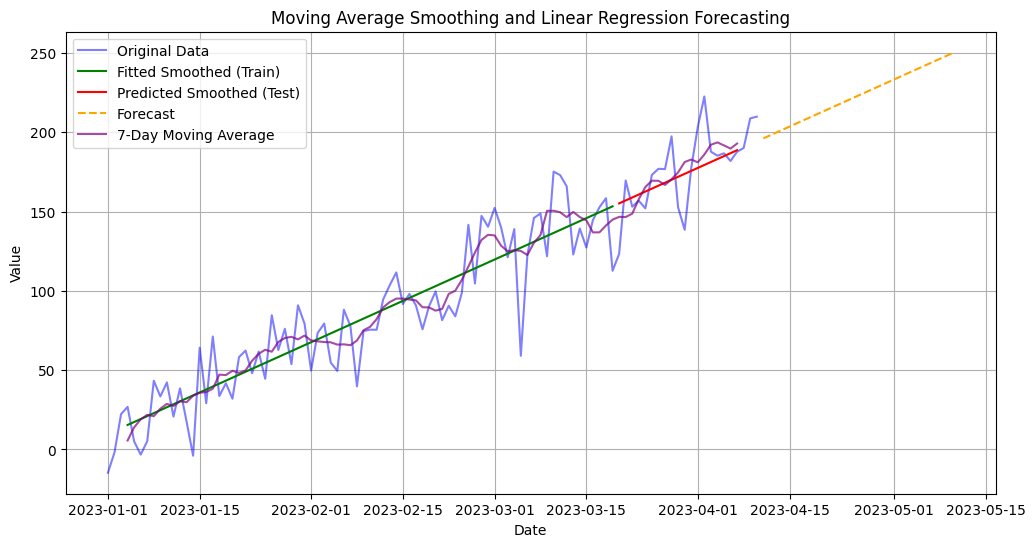

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Generate sample time series data (linear trend with noise)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
data = pd.DataFrame({
    'Date': dates,
    'Value': 2 * np.arange(100) + np.random.normal(0, 20, 100)  # Linear trend + noise
})
data.set_index('Date', inplace=True)

# Step 2: Apply moving average smoothing (7-day window, centered)
window_size = 7
data['Smoothed'] = data['Value'].rolling(window=window_size, center=True).mean()

# Step 3: Prepare data for modeling (use numerical time index)
data['Time'] = np.arange(len(data))
data_clean = data.dropna(subset=['Smoothed'])  # Drop NaN values from smoothing

# Step 4: Define features and target
X = data_clean[['Time']]
y = data_clean['Smoothed']

# Step 5: Split into training and testing sets
X_train = X.iloc[:int(0.8 * len(X))]
X_test = X.iloc[int(0.8 * len(X)):]
y_train = y.iloc[:int(0.8 * len(y))]
y_test = y.iloc[int(0.8 * len(y)):]

# Step 6: Train linear regression model on smoothed data
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)
print(f"Training R² Score: {train_r2:.2f}")
print(f"Testing R² Score: {test_r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Step 9: Forecast future values (next 30 days)
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_time = np.arange(len(data), len(data) + 30).reshape(-1, 1)
future_pred = model.predict(future_time)

# Step 10: Visualize original, smoothed, predicted, and forecasted data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Value'], color='blue', label='Original Data', alpha=0.5)
plt.plot(data_clean.index[:len(X_train)], y_pred_train, color='green', label='Fitted Smoothed (Train)')
plt.plot(data_clean.index[len(X_train):], y_pred_test, color='red', label='Predicted Smoothed (Test)')
plt.plot(future_dates, future_pred, color='orange', linestyle='--', label='Forecast')
plt.plot(data.index, data['Smoothed'], color='purple', label=f'{window_size}-Day Moving Average', alpha=0.7)
plt.title('Moving Average Smoothing and Linear Regression Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()